# Data Colletion in Bluesky

Data collection is performed using the `RunEngine` object, which is `RE` in the data collection environment.  In this notebook we demonstrate the basic tools and commands needed to collect data at SSRL beamline 1-5 using an area detector.  

see [official documentation](https://blueskyproject.io/bluesky/index.html) for a more complete explanation of Bluesky's functionality.

In [1]:
# Initialize the environment
from ssrlsim.scripts.start_RE import *

# Expose motors and detectors for this simulation
from ssrlsim.hitp_waxs import *

Filestore path: c:\Users\roberttk\Desktop\SLAC_RA\bluesky-dev\ssrlsim\notebooks\fstore


## Collecting data from the Dexela detector
Other area detectors operate similarly, but we use the Dexela as an example.  Simply pass in a list of detectors (and motors if applicable) to standard bluesky plans, and the `RunEngine` takes care of the rest



Transient Scan ID: 1     Time: 2020-06-10 10:31:39
Persistent Unique Scan ID: '79cbf918-57db-4514-b2ec-7898c4a1c8e4'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
|         1 | 10:31:39.5 |      1.000 |      0.607 |
|         2 | 10:31:39.6 |      2.333 |      0.066 |
|         3 | 10:31:39.6 |      3.667 |      0.001 |
|         4 | 10:31:39.7 |      5.000 |      0.000 |
+-----------+------------+------------+------------+
generator scan ['79cbf918'] (scan num: 1)





('79cbf918-57db-4514-b2ec-7898c4a1c8e4',)

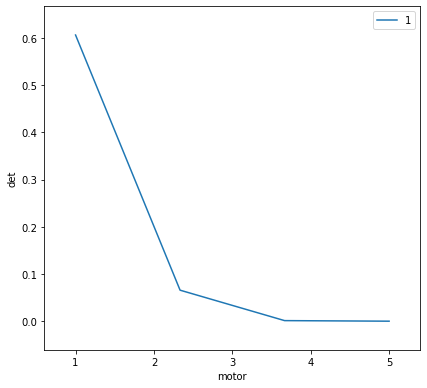

In [2]:
from ophyd.sim import det, motor
RE(bp.scan([det], motor, 1, 5, 4))

In [2]:
# Take an exposure from the dexela detector
RE( bp.count([dexDet], num=1) )

# modify parameters via EDM GUI, preferably not from the command line

# You can also collect from multiple detectors at the same time
# RE(bp.count([dexDet, xsp3]))



Transient Scan ID: 1     Time: 2020-06-10 10:46:02
Persistent Unique Scan ID: '4fa8350b-6f16-4f51-95a6-f1dca28e8abe'
New stream: 'primary'
+-----------+------------+
|   seq_num |       time |
+-----------+------------+
|         1 | 10:46:02.8 |
+-----------+------------+
generator count ['4fa8350b'] (scan num: 1)





('4fa8350b-6f16-4f51-95a6-f1dca28e8abe',)

In [3]:
db[-1].table(fill=True)

,time,Dexela 2923
seq_num,,
1,2020-06-10 17:46:02.857507944,"[[6.766764161830635, 6.8197981070194045, 6.872..."


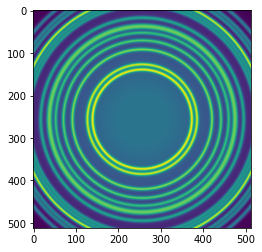

In [4]:
plt.imshow(db[-1].table(fill=True)['Dexela 2923'][1])

In [5]:
# The scan plan works as in the alignment notebook
RE( bp.scan([dexDet, xsp3], stage.stage_x, -10, 10, num=21))



Transient Scan ID: 2     Time: 2020-06-10 10:46:08
Persistent Unique Scan ID: '95a1c31f-d1b2-4296-b9ab-94d4e5b24ae9'
New stream: 'primary'
+-----------+------------+--------------------+
|   seq_num |       time | HiTp_Stage_stage_x |
+-----------+------------+--------------------+
|         1 | 10:46:08.0 |            -10.000 |
|         2 | 10:46:08.1 |             -9.000 |
|         3 | 10:46:08.1 |             -8.000 |
|         4 | 10:46:08.2 |             -7.000 |
|         5 | 10:46:08.2 |             -6.000 |
|         6 | 10:46:08.3 |             -5.000 |
|         7 | 10:46:08.3 |             -4.000 |
|         8 | 10:46:08.4 |             -3.000 |
|         9 | 10:46:08.4 |             -2.000 |
|        10 | 10:46:08.4 |             -1.000 |
|        11 | 10:46:08.5 |              0.000 |
|        12 | 10:46:08.5 |              1.000 |
|        13 | 10:46:08.6 |              2.000 |
|        14 | 10:46:08.6 |              3.000 |
|        15 | 10:46:08.6 |              4.0

('95a1c31f-d1b2-4296-b9ab-94d4e5b24ae9',)

In [12]:
# The stage positions are recoreded in the 'stage' object.  Access them with the stage.sample_loc_list() method and unpack them into the list_scan plan

RE( bp.list_scan([dexDet, xsp3], *stage.sample_loc_list(index=[1,2,3])) )

Run aborted
Traceback (most recent call last):
  File "C:\Users\roberttk\.conda\envs\collect2\lib\site-packages\bluesky\run_engine.py", line 1353, in _run
    msg = self._plan_stack[-1].send(resp)
  File "C:\Users\roberttk\.conda\envs\collect2\lib\site-packages\bluesky\preprocessors.py", line 1307, in __call__
    return (yield from plan)
  File "C:\Users\roberttk\.conda\envs\collect2\lib\site-packages\bluesky\preprocessors.py", line 1160, in baseline_wrapper
    return (yield from plan)
  File "C:\Users\roberttk\.conda\envs\collect2\lib\site-packages\bluesky\preprocessors.py", line 803, in monitor_during_wrapper
    return (yield from plan2)
  File "C:\Users\roberttk\.conda\envs\collect2\lib\site-packages\bluesky\preprocessors.py", line 170, in plan_mutator
    raise ex
  File "C:\Users\roberttk\.conda\envs\collect2\lib\site-packages\bluesky\preprocessors.py", line 123, in plan_mutator
    msg = plan_stack[-1].send(ret)
  File "C:\Users\roberttk\.conda\envs\collect2\lib\site-packages\

TypeError: 'numpy.float64' object is not iterable

In [2]:
stage.sample_loc_list(index=[1,2,3])

[SynAxis(prefix='', name='HiTp_Stage_stage_x', parent='HiTp_Stage', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration']),
 -13.5,
 SynAxis(prefix='', name='HiTp_Stage_stage_y', parent='HiTp_Stage', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration']),
 -27.0,
 SynAxis(prefix='', name='HiTp_Stage_stage_z', parent='HiTp_Stage', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration']),
 0,
 SynAxis(prefix='', name='HiTp_Stage_plate_x', parent='HiTp_Stage', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration']),
 0,
 SynAxis(prefix='', name='HiTp_Stage_plate_y', parent='HiTp_Stage', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration']),
 0,
 SynAxis(prefix='', name='HiTp_Stage_theta', parent='HiTp_Stage', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration']),
 0,
 SynAxis(prefix='', name='HiTp_Sta

In [9]:
db[-1].table()

,time,Xspress3EXAMPLE,HiTp_Stage_stage_x,HiTp_Stage_stage_x_setpoint,HiTp_Stage_stage_y,HiTp_Stage_stage_y_setpoint,Dexela 2923,HiTp_Stage_stage_z,HiTp_Stage_stage_z_setpoint,HiTp_Stage_plate_x,HiTp_Stage_plate_x_setpoint,HiTp_Stage_theta,HiTp_Stage_theta_setpoint,HiTp_Stage_plate_y,HiTp_Stage_plate_y_setpoint
seq_num,,,,,,,,,,,,,,,
1,2020-06-10 17:46:12.942833424,0819acab-6660-4523-9821-b80a9d6711b0/0,0.0,0.0,-31.5,-31.5,3f230e69-3f24-4874-91b9-855c9f2cb43b/0,0,0,0,0,0,0,0,0
2,2020-06-10 17:46:12.991739750,1c9f894f-ef46-45b5-a5b0-3ea8ea5e54d6/0,-13.5,-13.5,-27.0,-27.0,11af7e69-b760-4f67-b949-781829f19671/0,0,0,0,0,0,0,0,0
3,2020-06-10 17:46:13.038613081,a0cf79b4-7170-4a22-8c05-57bcc7aa2712/0,-9.0,-9.0,-27.0,-27.0,ce01197c-4075-4506-8715-cfcc5b1bceea/0,0,0,0,0,0,0,0,0
4,2020-06-10 17:46:13.085488796,0dcb9b7c-807c-4b30-a4e6-ed3dc766f7d6/0,-4.5,-4.5,-27.0,-27.0,e9dc9090-3532-4b03-b5d7-46ca13e86b04/0,0,0,0,0,0,0,0,0
5,2020-06-10 17:46:13.135871887,dbf55659-e1b4-4314-917f-b285452b4a26/0,0.0,0.0,-27.0,-27.0,3b941fda-ce91-49f5-8c62-3d0c890bb691/0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020-06-10 17:46:19.320078850,c1bd6e97-8559-4841-8a47-2e8a9a17fed7/0,0.0,0.0,27.0,27.0,8eb98287-f2fa-4849-9497-0ffb78dc228a/0,0,0,0,0,0,0,0,0
146,2020-06-10 17:46:19.363126993,460ec4de-90d5-47b6-8d28-d833cb78598e/0,4.5,4.5,27.0,27.0,94509d33-d7d8-41fb-af83-fcc557507cb7/0,0,0,0,0,0,0,0,0
147,2020-06-10 17:46:19.405016422,3660896c-86d2-44b7-94b6-66d7f07bf425/0,9.0,9.0,27.0,27.0,e59cca54-fb7f-4739-99e5-54424894f2f0/0,0,0,0,0,0,0,0,0
